In [1]:
# https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
def to_number(x):
    return int(x.replace(',',''))

In [43]:
data = pd.read_csv("master.csv")
countries = data.country.unique() # 101 Countries
years = data.year.unique() # 1987 - 2016
age_range = data.age.unique() # 5-14, 15-24, 25-34, 35-54, 55-74, 75+
data.drop(['country-year','generation'], axis=1, inplace=True)
data['gdp_for_year($)'] = data['gdp_for_year($)'].apply(to_number)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDIForYear,gdp_for_year($),gdp_per_capita($)
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,2156624900,796
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,2156624900,796
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,2156624900,796
8,Albania,1987,male,55-74 years,1,137500,0.73,NaN,2156624900,796
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,2156624900,796


In [13]:
data.corr()[['suicides_no',"suicides/100k pop"]].style.background_gradient(cmap='YlOrRd')

,suicides_no,suicides/100k pop
year,-0.00454596,-0.0390368
suicides_no,1,0.306604
population,0.616162,0.00828497
suicides/100k pop,0.306604,1
HDIForYear,0.151399,0.0742791
gdp_for_year($),0.430096,0.0252396
gdp_per_capita($),0.0613297,0.00178513


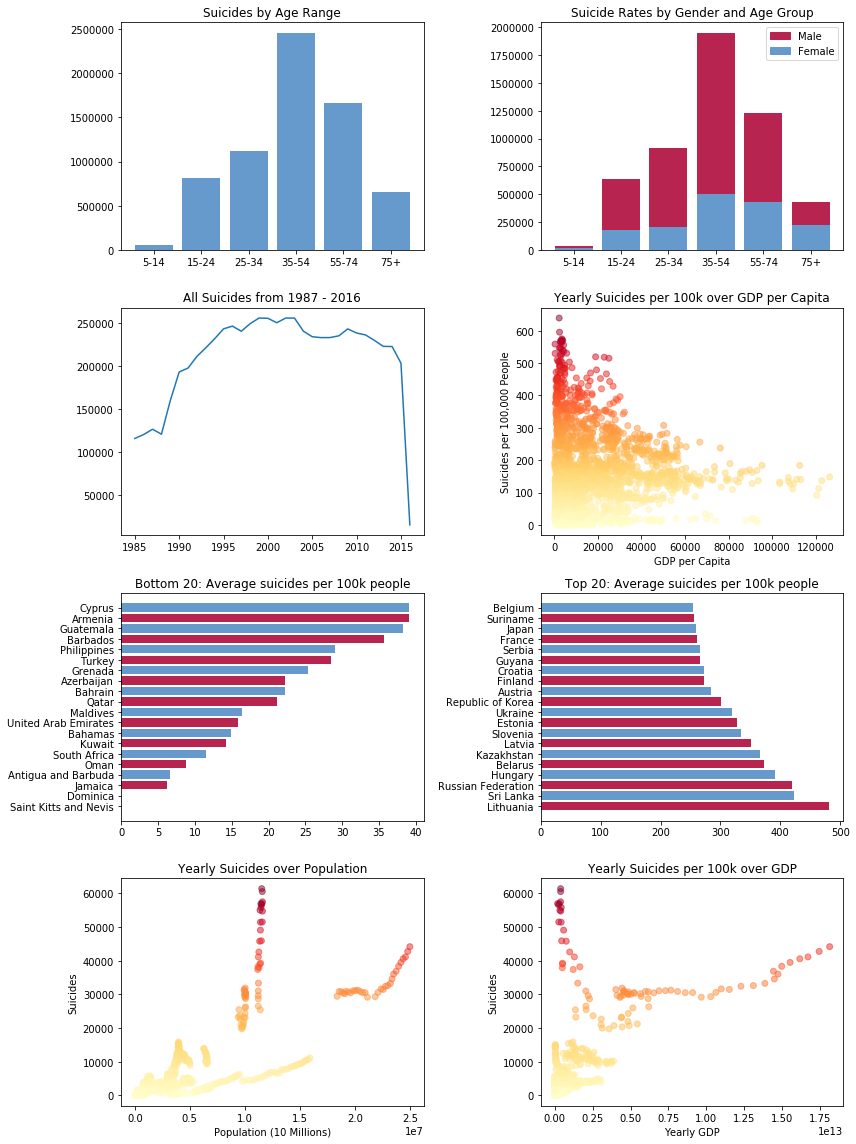

In [12]:
plt.figure(figsize=(12,16))

plt.subplot(4,2,1)
ages = data.groupby('age')['suicides_no'].sum().reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.bar(ages.index.str.replace(' years',''), ages, color="#6699cc")
plt.title('Suicides by Age Range')

plt.subplot(4,2,2)
male = data[data['sex'] == 'male'].groupby('age')['suicides_no'].sum().reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
female = data[data['sex'] == 'female'].groupby('age')['suicides_no'].sum().reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
plt.bar(male.index.str.replace(' years', ''), male.values, color='#b6244f')
plt.bar(female.index.str.replace(' years', ''),female.values, color='#6699cc')
red_patch = mpatches.Patch(color='#b6244f', label='Male')
green_patch = mpatches.Patch(color='#6699cc', label='Female')
plt.legend(handles=[red_patch,green_patch])
plt.title('Suicide Rates by Gender and Age Group')

plt.subplot(4,2,3)
plt.plot(data.groupby('year')['suicides_no'].sum())
plt.title('All Suicides from 1987 - 2016')

plt.subplot(4,2,4)
suicide100k = data.groupby(['country','year'])['suicides/100k pop'].sum().reset_index()
suicide100k['gdp_per_capita($)'] = data.groupby(['country','year'])['gdp_per_capita($)'].mean().reset_index()[['gdp_per_capita($)']]
suicide100k = suicide100k[suicide100k['gdp_per_capita($)']>0]
plt.scatter(suicide100k['gdp_per_capita($)'], suicide100k['suicides/100k pop'],c=suicide100k['suicides/100k pop'], cmap='YlOrRd', alpha = .5)
plt.title('Yearly Suicides per 100k over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 People')

plt.subplot(4,2,5)
avg_death_per_100k = data.groupby(['country','year'])['suicides/100k pop'].sum().reset_index().groupby('country')['suicides/100k pop'].mean().reset_index().sort_values(by=['suicides/100k pop'])
plt.barh(avg_death_per_100k.head(20)['country'], avg_death_per_100k.head(20)['suicides/100k pop'], color=["#b6244f","#6699cc"])
plt.title('Bottom 20: Average suicides per 100k people')

plt.subplot(4,2,6)
avg_death_per_100k = data.groupby(['country','year'])['suicides/100k pop'].sum().reset_index().groupby('country')['suicides/100k pop'].mean().reset_index().sort_values(by=['suicides/100k pop'], ascending=False)
plt.barh(avg_death_per_100k.head(20)['country'], avg_death_per_100k.head(20)['suicides/100k pop'],color=["#b6244f","#6699cc"])
plt.title('Top 20: Average suicides per 100k people')

plt.subplot(4,2,7)
suicide100k = data.groupby(['country','year'])['suicides_no'].sum().reset_index()
suicide100k['population'] = data.groupby(['country','year'])['population'].mean().reset_index()[['population']]
suicide100k = suicide100k[suicide100k['population']>0]
plt.scatter(suicide100k['population'],suicide100k['suicides_no'],c=suicide100k['suicides_no'], cmap='YlOrRd', alpha = .5)
plt.title('Yearly Suicides over Population')
plt.xlabel('Population (10 Millions)')
plt.ylabel('Suicides')

plt.subplot(4,2,8)
suicide100k = data.groupby(['country','year'])['suicides_no'].sum().reset_index()
suicide100k['gdp_for_year($)'] = data.groupby(['country','year'])['gdp_for_year($)'].mean().reset_index()[['gdp_for_year($)']]
suicide100k = suicide100k[suicide100k['gdp_for_year($)']>0]
plt.scatter(suicide100k['gdp_for_year($)'],suicide100k['suicides_no'],c=suicide100k['suicides_no'], cmap='YlOrRd', alpha = .5)
plt.title('Yearly Suicides per 100k over GDP')
plt.xlabel('Yearly GDP')
plt.ylabel('Suicides')

plt.tight_layout()

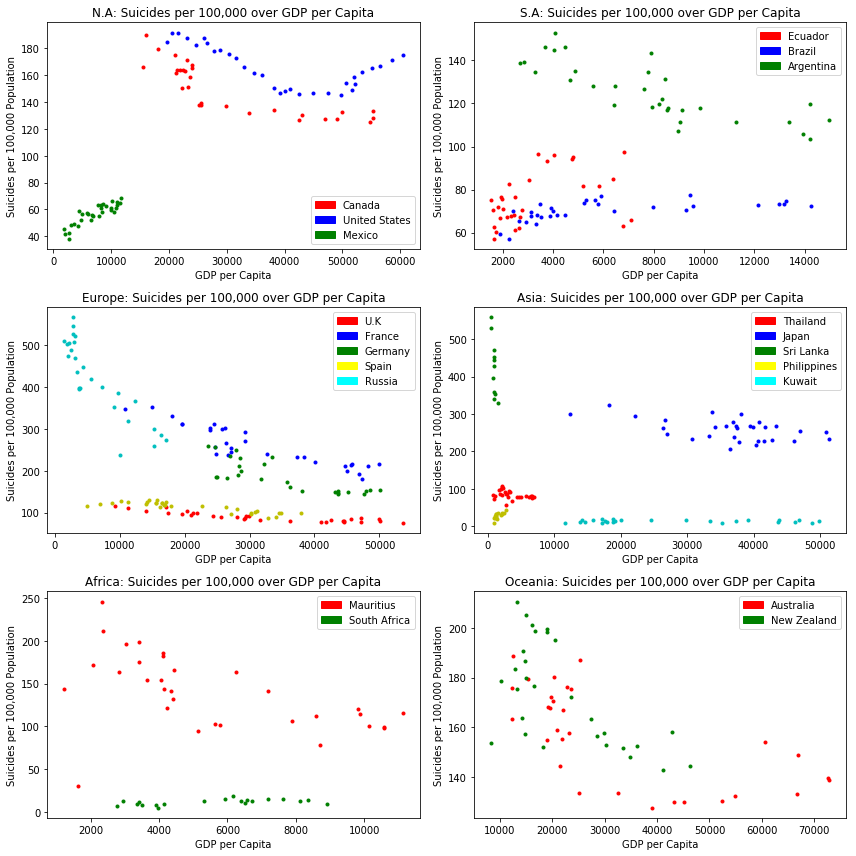

In [8]:
suicide100k = data.groupby(['country','year'])['suicides/100k pop'].sum().reset_index()
suicide100k['gdp_per_capita($)'] = data.groupby(['country','year'])['gdp_per_capita($)'].mean().reset_index()[['gdp_per_capita($)']]
suicide100k = suicide100k[suicide100k['gdp_per_capita($)']>0]

plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.plot(suicide100k[suicide100k['country'] == 'Canada']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Canada']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'United States']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'United States']['suicides/100k pop'],'b.')
plt.plot(suicide100k[suicide100k['country'] == 'Mexico']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Mexico']['suicides/100k pop'],'g.')
red_patch = mpatches.Patch(color='red', label='Canada')
blue_patch = mpatches.Patch(color='blue', label='United States')
green_patch = mpatches.Patch(color='green', label='Mexico')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.title('N.A: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.subplot(3,2,2)
plt.plot(suicide100k[suicide100k['country'] == 'Ecuador']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Ecuador']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'Brazil']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Brazil']['suicides/100k pop'],'b.')
plt.plot(suicide100k[suicide100k['country'] == 'Argentina']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Argentina']['suicides/100k pop'],'g.')
red_patch = mpatches.Patch(color='red', label='Ecuador')
blue_patch = mpatches.Patch(color='blue', label='Brazil')
green_patch = mpatches.Patch(color='green', label='Argentina')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.title('S.A: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.subplot(3,2,3)
plt.plot(suicide100k[suicide100k['country'] == 'United Kingdom']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'United Kingdom']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'France']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'France']['suicides/100k pop'],'b.')
plt.plot(suicide100k[suicide100k['country'] == 'Germany']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Germany']['suicides/100k pop'],'g.')
plt.plot(suicide100k[suicide100k['country'] == 'Spain']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Spain']['suicides/100k pop'],'y.')
plt.plot(suicide100k[suicide100k['country'] == 'Russian Federation']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Russian Federation']['suicides/100k pop'],'c.')
red_patch = mpatches.Patch(color='red', label='U.K')
blue_patch = mpatches.Patch(color='blue', label='France')
green_patch = mpatches.Patch(color='green', label='Germany')
yellow_patch = mpatches.Patch(color='yellow', label='Spain')
pink_patch = mpatches.Patch(color='cyan', label='Russia')
plt.legend(handles=[red_patch,blue_patch,green_patch, yellow_patch, pink_patch])
plt.title('Europe: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.subplot(3,2,4)
plt.plot(suicide100k[suicide100k['country'] == 'Thailand']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Thailand']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'Japan']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Japan']['suicides/100k pop'],'b.')
plt.plot(suicide100k[suicide100k['country'] == 'Sri Lanka']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Sri Lanka']['suicides/100k pop'],'g.')
plt.plot(suicide100k[suicide100k['country'] == 'Philippines']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Philippines']['suicides/100k pop'],'y.')
plt.plot(suicide100k[suicide100k['country'] == 'Kuwait']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Kuwait']['suicides/100k pop'],'c.')
red_patch = mpatches.Patch(color='red', label='Thailand')
blue_patch = mpatches.Patch(color='blue', label='Japan')
green_patch = mpatches.Patch(color='green', label='Sri Lanka')
yellow_patch = mpatches.Patch(color='yellow', label='Philippines')
pink_patch = mpatches.Patch(color='cyan', label='Kuwait')
plt.legend(handles=[red_patch,blue_patch,green_patch, yellow_patch, pink_patch])
plt.title('Asia: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.subplot(3,2,5)
plt.plot(suicide100k[suicide100k['country'] == 'Mauritius']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Mauritius']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'South Africa']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'South Africa']['suicides/100k pop'],'g.')
red_patch = mpatches.Patch(color='red', label='Mauritius')
green_patch = mpatches.Patch(color='green', label='South Africa')
plt.legend(handles=[red_patch,green_patch])
plt.title('Africa: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.subplot(3,2,6)
plt.plot(suicide100k[suicide100k['country'] == 'Australia']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'Australia']['suicides/100k pop'],'r.')
plt.plot(suicide100k[suicide100k['country'] == 'New Zealand']['gdp_per_capita($)'],suicide100k[suicide100k['country'] == 'New Zealand']['suicides/100k pop'],'g.')
red_patch = mpatches.Patch(color='red', label='Australia')
green_patch = mpatches.Patch(color='green', label='New Zealand')
plt.legend(handles=[red_patch,green_patch])
plt.title('Oceania: Suicides per 100,000 over GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100,000 Population')

plt.tight_layout()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelBinarizer 

In [61]:
data = pd.read_csv("master.csv")
data = data.drop(['HDIForYear','year','suicides/100k pop'], axis=1)
data.drop(['country-year','generation'], axis=1, inplace=True)
data['gdp_for_year($)'] = data['gdp_for_year($)'].apply(to_number)

encoder = LabelBinarizer()
c = encoder.fit_transform(data['country'].values.reshape(-1, 1))
c = pd.DataFrame(data=c, columns=countries)

data['sex'] = data['sex'].apply(lambda x: 0 if x == 'male' else 1)

a = encoder.fit_transform(data['age'].values.reshape(-1, 1))
a = pd.DataFrame(data=a, columns=age_range)
c.append

TypeError: append() got an unexpected keyword argument 'axis'

In [62]:
??c.append